In [1]:
import pennylane as qml
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [39]:
wires = range(9)
dev = qml.device('default.qubit', wires=wires)

In [2]:
data = np.load('data/preprocessed/prices_32_8.npy', allow_pickle=True)

In [4]:
def CNN_b(matrix):
    matrix = tf.keras.layers.Conv1D(4, 3, activation='relu', input_shape=(10, 50))(matrix)
    matrix = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(matrix)
    matrix = tf.keras.layers.Flatten()(matrix)
    return matrix

In [5]:
initializer = tf.keras.initializers.VarianceScaling(scale=1, mode='fan_in', distribution='untruncated_normal')

In [6]:
def CNN_f(matrix):
    matrix = tf.keras.layers.Conv1D(2, 3, input_shape=(10, 10))(matrix)
    matrix = tf.keras.layers.Flatten()(matrix)
    return matrix

In [20]:
def CNNT(matrix):
    matrix = tf.reshape(matrix, (1,8,2))
    matrix = tf.keras.layers.Conv1DTranspose(10, 3)(matrix)
    return matrix

In [3]:
print(len(data)) # Assets
print(len(data[3])) # Sequences
print(len(data[2][2])) # b, f
print(len(data[3][3][0])) # b
print(len(data[3][3][1])) # f

10
2274
2
32
8


In [4]:
data = np.array(data)

In [16]:
arr = []

for a in range(len(data[0])):
    for b in range(len(data)):
        arr1 = [[]]
        arr1[0] = list(data[b][a][0])
        for bit in data[b][a][1]:
            arr1[0].append(bit)
        arr.append(arr1)

In [22]:
print(len(arr[0][0]))

40


In [7]:
print(len(a))

4509


In [12]:
Mb = []
for i in range(len(data)):
    Mb.append(data[i][0][0])
Mf = []
for i in range(len(data)):
    Mf.append(data[i][0][1])

In [37]:
matrix = tf.convert_to_tensor(np.array(Mb).reshape(1,10,50))

In [38]:
matrixf = tf.convert_to_tensor(np.array(Mf).reshape(1,10,10))

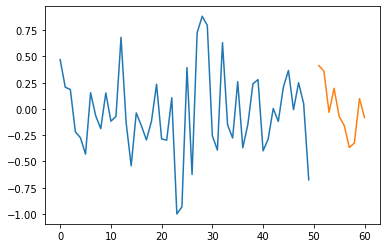

In [17]:
x1 = range(50)
x2 = range(51, 61)
a = np.array(matrix)
b = np.array(matrixf)
plt.plot(x1, a[0][0])
plt.plot(x2, b[0][0])

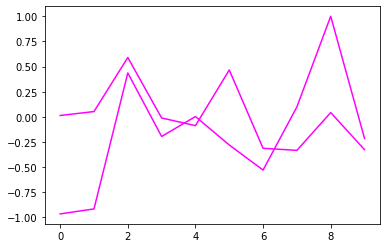

In [27]:
a = np.array(matrixf)
b = np.array(CNNT(CNN_f(matrixf)))
x = range(10)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'lightblue', 'lightgreen', 'orange']
i = 4
plt.plot(x, a[0][i], color = colors[i])
plt.plot(x, b[0][i], color = colors[i])

In [32]:
def tensor_to_data(matrix):
    matrix = tf.keras.layers.Flatten()(matrix)
    return matrix

In [34]:
print(tensor_to_data(matrix).shape)

(1, 100)


In [35]:
def encode_b(array, wires):
    qml.templates.AngleEmbedding(features, wires)

def encode_f(tensor, wires):
    features = np.array(tensor_to_data(tensor))[0]
    qml.templates.AngleEmbedding(features, wires, rotation='Z')

In [7]:
def generator(w):
    qml.broadcast(unitary=qml.RY, pattern = 'single', wires = wires, parameters = w[0:32])
    for k in range(1, w/32):
        qml.broadcast(unitary=qml.RY, pattern = 'single', wires = wires, parameters = w[(32*k):(32*(k+1))])
        qml.broadcast(unitary=qml.CZ, pattern = 'ring', wires=wires)

In [8]:
@qml.qnode(dev, interface="tf")
def gen_circuit(array, gen_weights):
    qml.templates.AngleEmbedding(array, wires, rotation='Y')
    generator(gen_weights)
    return [qml.expval(qml.PauliX(i)) for i in range(8)]

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=[1, 40]))
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

w = model.get_weights()
w1 = []
for i in range(len(w)):
    w1.append(tf.convert_to_tensor(w[i]))
model.set_weights(w1)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 1, 16)             656       
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 1, 16)             272       
_________________________________________________________________
dense_52 (Dense)             (None, 1, 128)            2176      
_________________________________________________________________
dense_53 (Dense)             (None, 1, 1)              129       
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________


In [13]:
def prob_real_true(array):
    true_disc_output = model(array)
    prob_real_true = (true_disc_output + 1) / 2
    return prob_real_true

def prob_fake_true(array, gen_weights):
    w = array[:32]
    f = gen_circuit(w, gen_weights)
    w.append(np.array(f))
    fake_disc_output = model

    fake_disc_output = gen_disc_circuit(tensor, gen_weights, disc_weights)
    prob_fake_true = (fake_disc_output + 1) / 2
    return prob_fake_true

def disc_cost(disc_weights):
    cost = prob_fake_nnp.array(model(tensor)[0][0])[0] prob_real_true(disc_weights)
    return cost

def gen_cost(gen_weights):
    return -prob_fake_true(gen_weights, disc_weights)

In [23]:
phi = np.pi / 6
theta = np.pi / 2
omega = np.pi / 7
np.random.seed(0)
eps = 1e-2
init_gen_weights = np.array([np.pi] + [0] * 8) + \
                   np.random.normal(scale=eps, size=(9,))
init_disc_weights = np.random.normal(size=(9,))

print(init_gen_weights, init_disc_weights)

gen_weights = tf.Variable(init_gen_weights)
disc_weights = tf.Variable(init_disc_weights)

[ 3.15923318e+00  4.00157208e-03  9.78737984e-03  2.24089320e-02
  1.86755799e-02 -9.77277880e-03  9.50088418e-03 -1.51357208e-03
 -1.03218852e-03] [ 0.4105985   0.14404357  1.45427351  0.76103773  0.12167502  0.44386323
  0.33367433  1.49407907 -0.20515826]


In [15]:
opt = tf.keras.optimizers.SGD(0.4)

In [16]:
cost = lambda: disc_cost(disc_weights)

for step in range(50):
    opt.minimize(cost, disc_weights)
    if step % 5 == 0:
        cost_val = cost().numpy()
        print("Step {}: cost = {}".format(step, cost_val))

Step 0: cost = -0.057276975525227536
Step 5: cost = -0.2634812476198912
Step 10: cost = -0.4273918875192454
Step 15: cost = -0.4726159790067175
Step 20: cost = -0.4840690013169291
Step 25: cost = -0.48946413762907626
Step 30: cost = -0.49281878129726764
Step 35: cost = -0.4949493300911135
Step 40: cost = -0.49627038906420917
Step 45: cost = -0.49707202726651034


In [17]:
print("Prob(real classified as real): ", prob_real_true(disc_weights).numpy())

Prob(real classified as real):  0.9985872756484402


In [18]:
print("Prob(fake classified as real): ", prob_fake_true(gen_weights, disc_weights).numpy())

Prob(fake classified as real):  0.5011127799743084


In [19]:
cost = lambda: gen_cost(gen_weights)

for step in range(50):
    opt.minimize(cost, gen_weights)
    if step % 5 == 0:
        cost_val = cost().numpy()
        print("Step {}: cost = {}".format(step, cost_val))

Step 0: cost = -0.5833387114272242
Step 5: cost = -0.8915733584386554
Step 10: cost = -0.9784243514765137
Step 15: cost = -0.9946483799106701
Step 20: cost = -0.9984996421562102
Step 25: cost = -0.9995638462161758
Step 30: cost = -0.9998717843842404
Step 35: cost = -0.9999621461863373
Step 40: cost = -0.9999888012331577
Step 45: cost = -0.9999966824994235


In [20]:
print("Prob(fake classified as real): ", prob_fake_true(gen_weights, disc_weights).numpy())

Prob(fake classified as real):  0.9999987450405173


In [21]:
print("Discriminator cost: ", disc_cost(disc_weights).numpy())

Discriminator cost:  0.001411469392077147


In [22]:
obs = [qml.PauliX(0), qml.PauliY(0), qml.PauliZ(0)]

bloch_vector_real = qml.map(real, obs, dev, interface="tf")
bloch_vector_generator = qml.map(generator, obs, dev, interface="tf")

print("Real Bloch vector: {}".format(bloch_vector_real([phi, theta, omega])))
print("Generator Bloch vector: {}".format(bloch_vector_generator(gen_weights)))

Real Bloch vector: [-0.21694191  0.45048443 -0.8660254 ]
Generator Bloch vector: [-0.28404669  0.41893227 -0.86244414]
